1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (20640, 9)
   Cible à prédire : 'target' (Valeur Médiane des Maisons, en centaines de milliers de $)

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 8256

4. Nettoyage et Préparation des données...
   a. Imputation terminée (les NaN ont été remplacés par la moyenne).
     Valeurs manquantes restantes : 0
   b. Mise à l'échelle (StandardScaler) terminée.

5. Analyse Exploratoire (EDA)...
   Statistiques descriptives de la variable cible :
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64


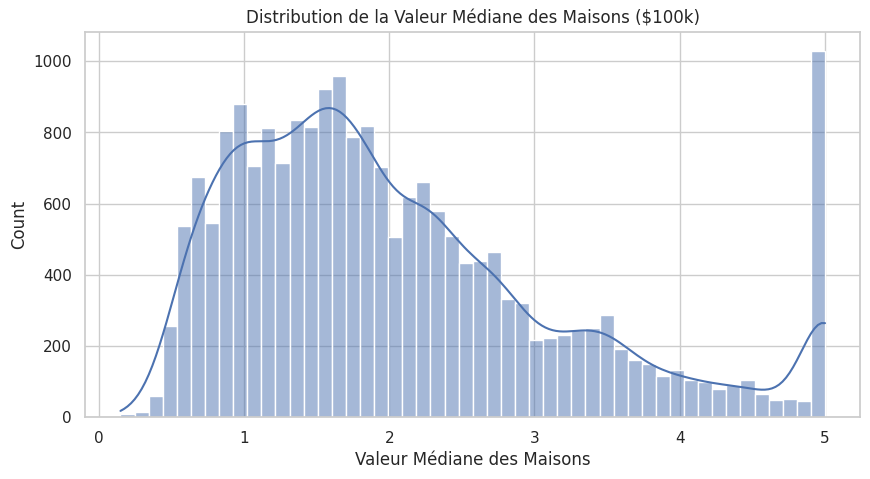

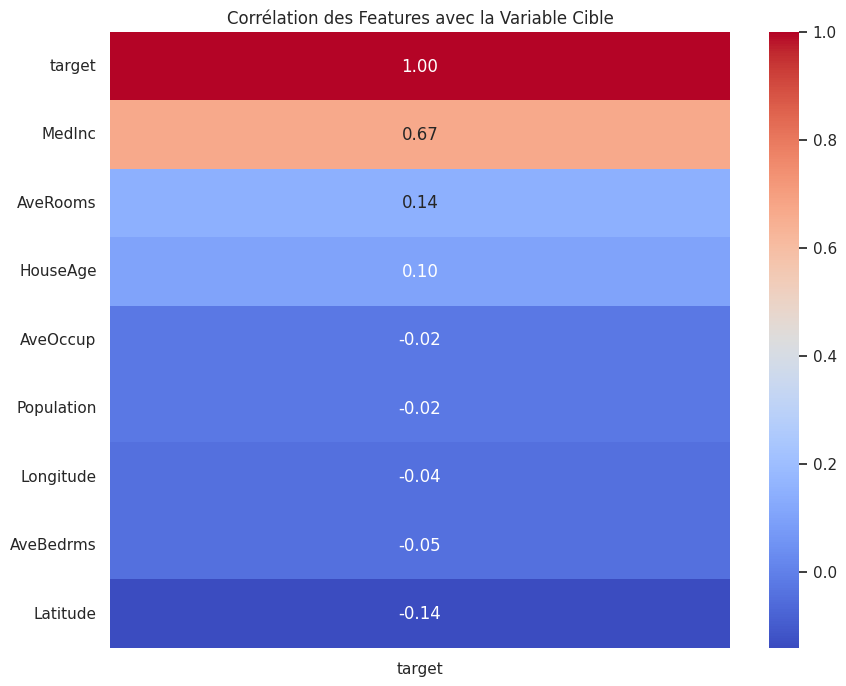


6. Séparation effectuée :
   Entraînement : 16512 échantillons
   Test : 4128 échantillons

7. Entraînement du modèle (Random Forest Regressor)...
   Modèle entraîné avec succès.

8. Évaluation des performances...
   >>> R² Score : 0.2964 (Proche de 1 = bonne performance)
   >>> RMSE (Root Mean Squared Error) : 0.9602 ($100k)


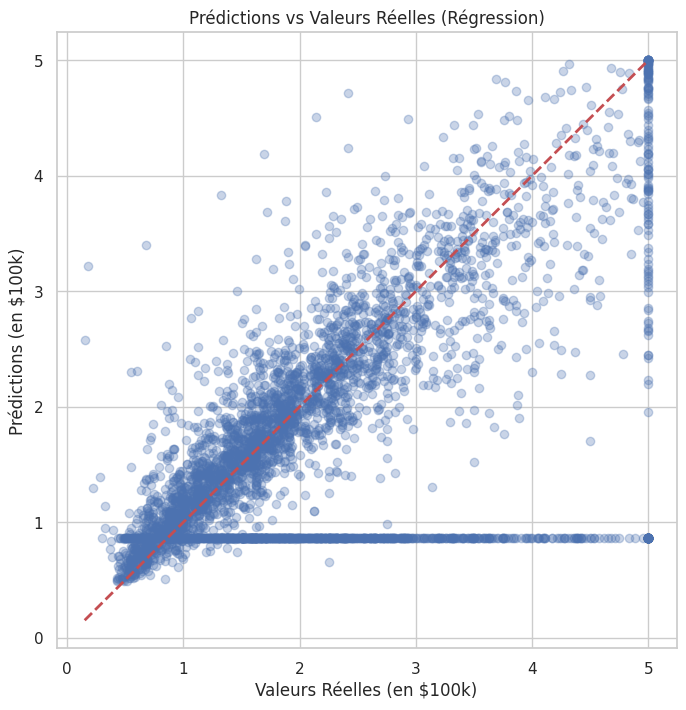


--- FIN DU SCRIPT ---


In [ ]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE)
# PROBLÈME DE RÉGRESSION : PRÉDICTION DES PRIX DES MAISONS EN CALIFORNIE
# Auteur : Votre Professeur IA
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn spécifiques
from sklearn.datasets import fetch_california_housing # NOUVEAU DATASET
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler # Ajout clé pour la régression
from sklearn.ensemble import RandomForestRegressor # MODÈLE DE RÉGRESSION
from sklearn.metrics import mean_squared_error, r2_score # MÉTRIQUES DE RÉGRESSION

# Configuration pour des graphiques plus esthétiques
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Pour garder la sortie propre

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
# Chargement du dataset depuis Scikit-Learn (California Housing)
# as_frame=True permet de récupérer directement un DataFrame
data = fetch_california_housing(as_frame=True)

# Le DataFrame est déjà dans data.frame
df = data.frame
df.rename(columns={'MedHouseVal': 'target'}, inplace=True) # Renommer la cible pour la cohérence

print(f"2. Données chargées. Taille du dataset : {df.shape}")
print(f"   Cible à prédire : 'target' (Valeur Médiane des Maisons, en centaines de milliers de $)\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE "DONNÉES SALES" (Pour l'exercice)
# ------------------------------------------------------------------------------
# Introduction artificielle de valeurs manquantes (NaN)
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42) # Pour la reproductibilité
mask = np.random.random(df.shape) < 0.05 # Masque de 5%

features_columns = df.columns[:-1]
df_dirty = df.copy()
for col in features_columns:

# Application des NaN à 5% des lignes pour chaque colonne
    df_dirty.loc[df_dirty.sample(frac=0.05, random_state=42).index, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION (Data Wrangling)
# ------------------------------------------------------------------------------
print("4. Nettoyage et Préparation des données...")

# Séparation Features (X) et Target (y)
X = df_dirty.drop('target', axis=1)
y = df_dirty['target']

# A. Imputation : Remplacer les NaN par la MOYENNE de la colonne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   a. Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"     Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}")

# B. Mise à l'échelle (Scaling) : Très important en Régression pour la performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
X_clean_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)


print("   b. Mise à l'échelle (StandardScaler) terminée.\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...")

# A. Aperçu statistique de la cible
print("   Statistiques descriptives de la variable cible :")
print(y.describe())

# B. Visualisation 1 : Distribution de la variable cible
plt.figure(figsize=(10, 5))
sns.histplot(y, kde=True, bins=50)
plt.title("Distribution de la Valeur Médiane des Maisons ($100k)")
plt.xlabel("Valeur Médiane des Maisons")
plt.show()

# C. Visualisation 2 : Heatmap de corrélation avec la cible
plt.figure(figsize=(10, 8))
# On utilise la cible avec les features nettoyées
correlation_matrix = pd.concat([X_clean, y], axis=1).corr()
# On affiche seulement la colonne des corrélations avec 'target'
sns.heatmap(correlation_matrix[['target']].sort_values(by='target', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Corrélation des Features avec la Variable Cible")
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION DES DONNÉES (Train / Test Split)
# ------------------------------------------------------------------------------
# On utilise les données mises à l'échelle (X_clean_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_clean_scaled, y, test_size=0.2, random_state=42)

print(f"\n6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (Machine Learning - Régression)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle (Random Forest Regressor)...")

# Initialisation du modèle de RÉGRESSION
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entraînement sur les données d'entraînement uniquement
model.fit(X_train, y_train)
print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION ET PERFORMANCE (Régression)
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...")

# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# A. R² Score (Coefficient de Détermination) : Mesure la qualité de l'ajustement
r2 = r2_score(y_test, y_pred)
print(f"   >>> R² Score : {r2:.4f} (Proche de 1 = bonne performance)")

# B. RMSE (Root Mean Squared Error) : L'erreur moyenne dans l'unité de la cible ($100k)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"   >>> RMSE (Root Mean Squared Error) : {rmse:.4f} ($100k)")

# C. Visualisation : Comparaison Réalité vs Prédiction
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
# Ligne idéale où Prédiction = Réalité
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valeurs Réelles (en $100k)")
plt.ylabel("Prédictions (en $100k)")
plt.title('Prédictions vs Valeurs Réelles (Régression)')
plt.show()


print("\n--- FIN DU SCRIPT ---")